In [104]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#load datasets
path1 = "..//Parking-Service//Data//Dataset1.xlsx"
path2 = "..//Parking-Service//Data//Dataset2.xlsx"
data1 = pd.read_excel(path1)
data2 = pd.read_excel(path2)

In [106]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5530 entries, 0 to 5529
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       5530 non-null   int64 
 1   Status                   5530 non-null   object
 2   Fine to pay              5530 non-null   int64 
 3   Already paid             5530 non-null   int64 
 4   Extra Charges            5530 non-null   int64 
 5   Cancellation Date        1475 non-null   object
 6   Cancellation Reason      1613 non-null   object
 7   Payment Date             3431 non-null   object
 8   Parking duration         5530 non-null   int64 
 9   Day of Violation         5530 non-null   object
 10  First Letter             4820 non-null   object
 11  Reminder Sent            1224 non-null   object
 12  First Warning            514 non-null    object
 13  Lot                      5530 non-null   object
 14  Total Pay                5530 non-null  

In [107]:
#How would you definr the payment rate of all offences?
#Payment rate = the total already paid / the total fine to pay

In [108]:
#Payment rate in dataset 1
total_already_paid_1= data1['Already paid'].sum()
total_fine_to_pay_1 = data1['Fine to pay'].sum()
payment_rate_1 = (total_already_paid_1/total_fine_to_pay_1)*100
print(f"{payment_rate_1:.2f}%")

63.99%


In [109]:
#Payment rate in dataset 2
total_already_paid_2= data2['Already paid'].sum()
total_fine_to_pay_2 = data2['Fine to pay'].sum()
payment_rate_2 = (total_already_paid_2/total_fine_to_pay_2)*100
print(f"{payment_rate_2:.2f}%")

35.78%


In [110]:
#Transform datatype
data1['Day of Violation'] = pd.to_datetime(data1['Day of Violation'])
data1['First Letter'] = pd.to_datetime(data1['First Letter'])
data1['Reminder Sent'] = pd.to_datetime(data1['Reminder Sent'])
data1['First Warning'] = pd.to_datetime(data1['First Warning'])
data1['Cancellation Date'] = pd.to_datetime(data1['Cancellation Date'])
data1['Payment Date'] = pd.to_datetime(data1['Payment Date'])

In [111]:
data1['first_ticket_period'] = data1['First Letter'] - data1['Day of Violation']
data1['pay_after_first_ticket_period'] = data1['Payment Date'] - data1['First Letter']

In [112]:
data1.head()

,ID,Status,Fine to pay,Already paid,Extra Charges,Cancellation Date,Cancellation Reason,Payment Date,Parking duration,Day of Violation,First Letter,Reminder Sent,First Warning,Lot,Total Pay,Allowed duration,Exceeded duration,License plate city code,first_ticket_period,pay_after_first_ticket_period
0,1,paid,30,30,10,NaT,NaN,2015-11-24,158,2015-11-10,2015-11-12,NaT,NaT,A026,40,120,38,M,2 days,12 days
1,2,first_warning_sent,30,0,15,NaT,NaN,NaT,1038,2015-11-20,2016-01-12,2016-01-29,2016-02-16,A036,45,120,918,MZ,53 days,NaT
2,3,paid,40,40,0,NaT,NaN,2015-11-20,666,2015-11-06,2015-11-09,NaT,NaT,A109,40,150,516,MTK,3 days,11 days
3,4,paid,20,20,0,NaT,NaN,2015-11-19,74,2015-11-10,2015-11-12,NaT,NaT,A129,20,80,-6,FR,2 days,7 days
4,5,paid,30,40,10,NaT,NaN,2015-12-08,225,2015-11-06,2015-11-27,NaT,NaT,A009,40,185,40,M,21 days,11 days


In [113]:
data1['first_ticket_period'] = data1['first_ticket_period'].dt.days
data1['pay_after_first_ticket_period'] = data1['pay_after_first_ticket_period'].dt.days

In [114]:
data1.head()

,ID,Status,Fine to pay,Already paid,Extra Charges,Cancellation Date,Cancellation Reason,Payment Date,Parking duration,Day of Violation,First Letter,Reminder Sent,First Warning,Lot,Total Pay,Allowed duration,Exceeded duration,License plate city code,first_ticket_period,pay_after_first_ticket_period
0,1,paid,30,30,10,NaT,NaN,2015-11-24,158,2015-11-10,2015-11-12,NaT,NaT,A026,40,120,38,M,2.0,12.0
1,2,first_warning_sent,30,0,15,NaT,NaN,NaT,1038,2015-11-20,2016-01-12,2016-01-29,2016-02-16,A036,45,120,918,MZ,53.0,NaN
2,3,paid,40,40,0,NaT,NaN,2015-11-20,666,2015-11-06,2015-11-09,NaT,NaT,A109,40,150,516,MTK,3.0,11.0
3,4,paid,20,20,0,NaT,NaN,2015-11-19,74,2015-11-10,2015-11-12,NaT,NaT,A129,20,80,-6,FR,2.0,7.0
4,5,paid,30,40,10,NaT,NaN,2015-12-08,225,2015-11-06,2015-11-27,NaT,NaT,A009,40,185,40,M,21.0,11.0


(array([4537.,  104.,   40.,   20.,   20.,    9.,    5.,   13.,   41.,
          31.]),
 array([  0. ,  13.3,  26.6,  39.9,  53.2,  66.5,  79.8,  93.1, 106.4,
        119.7, 133. ]),
 <BarContainer object of 10 artists>)

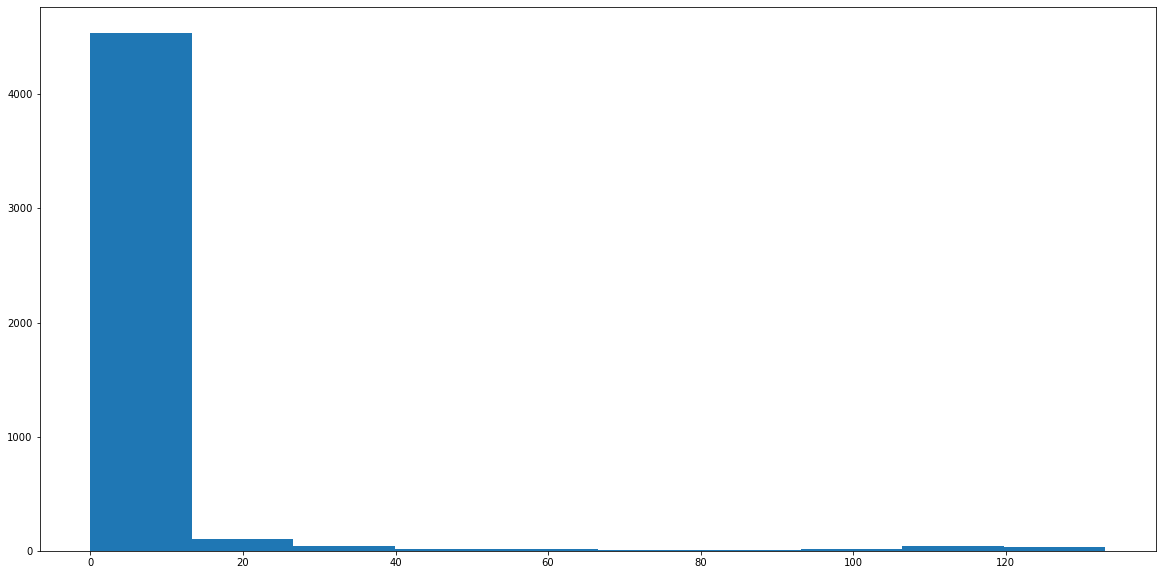

In [118]:
plt.figure(figsize=(20,10))
plt.hist(data1['first_ticket_period'])

(array([2.402e+03, 4.690e+02, 1.700e+02, 1.010e+02, 4.800e+01, 1.100e+01,
        1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([ -2. ,  17.8,  37.6,  57.4,  77.2,  97. , 116.8, 136.6, 156.4,
        176.2, 196. ]),
 <BarContainer object of 10 artists>)

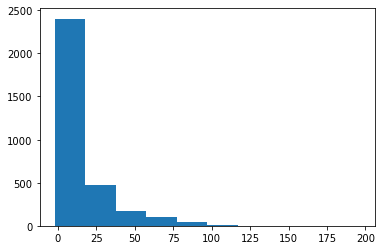

In [116]:
plt.hist(data1['pay_after_first_ticket_period'],)

Text(0, 0.5, 'first_ticket_period')

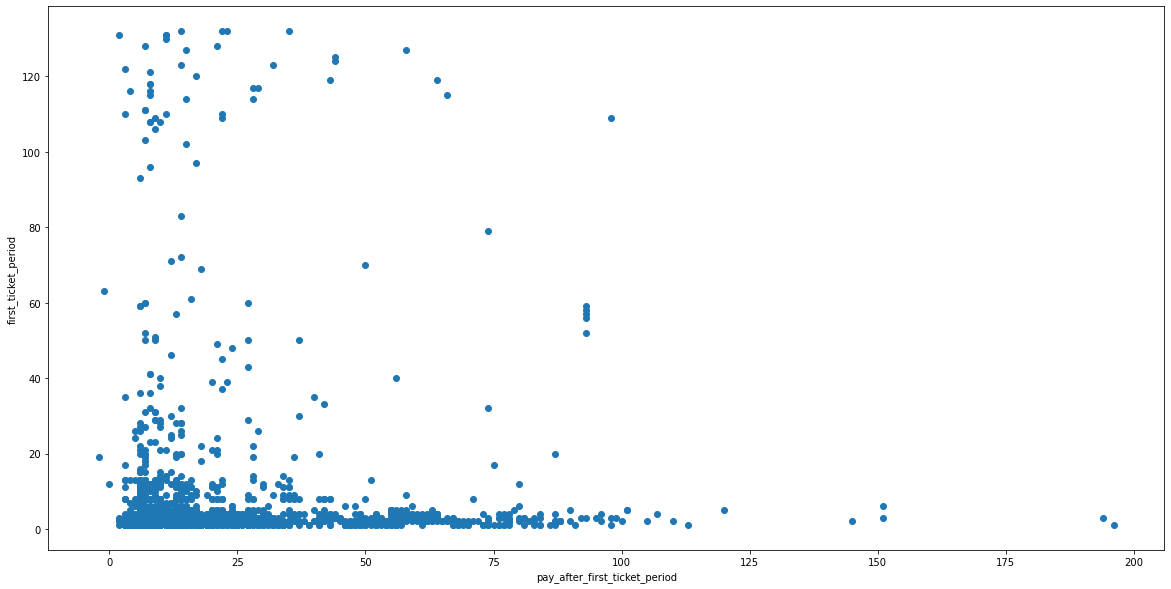

In [123]:
plt.figure(figsize=(20,10))
plt.scatter(x=data1['pay_after_first_ticket_period'], y = data1['first_ticket_period'])
plt.xlabel("pay_after_first_ticket_period")
plt.ylabel("first_ticket_period")